#  Tensors 

> ### NOTE: This notebook has math that will not display properly on github. The outputs of variables with superscripts $y^1(t)$ will display as $(t)$ without the variable name, please view on notbook viewer

https://nbviewer.jupyter.org/github/coderofgames/Python-Math/blob/master/Vectors/Tensors-5.ipynb

### Derivative of a Tensor.
   
In a general coordinate system $x^i$ the covariant derivative with respect to $x^r$ is 
   
$$\nabla_r \mathbf T_i = \frac{\partial \mathbf T_i}{\partial x^r} - \Gamma^p_{ir} \mathbf T_p $$
   
This is a tensor with covariant order 2. The quantity $\Gamma^p_{ir}$ is a Christoffel symbol of the 2nd kind, and these are defined in terms of the Christoffel symbols of the first kind (by convention) 
   
$$\Gamma^p_{ir} = g^{pq}\Gamma_{irq}$$
   
And the Christoffel symbols of the first kind are defined in terms of the metric...
   
$$\Gamma_{abc} = \frac{1}{2} \left( \frac{\partial g_{bc}}{\partial x^a}+\frac{\partial g_{ca}}{\partial x^b}-\frac{\partial g_{ab}}{\partial x^c}\right)$$

   Therefore the Christoffel symbols vanish if the metric has constant components (i.e no derivatives).

#### Theoretical background
   
The covariant derivative was derived from the fact that the ordinary derivative of a covariant tensor was not a tensor, and in fact required a correction term.

From set theory, a set is called connected if it is not disconnected. So if we defined the tensor $\mathbf T^i(y)$ as tensor expressed in a  coordinate system $ \mathscr M \subset\mathbb {R}^m|\forall y \circ (x^1,\cdots x^n)\to \mathbb {R}^m $ (i.e. curvilinear) and this is a set of coordinate maps to another coordinate system $\mathscr N \subset \mathbb {R}^n | \forall x\circ(y^1,\cdots,y^m) \to \mathbb {R}^n$ and a transform $\varphi:\mathbf T(y)\in \mathscr M  \to \mathbf T(x) \in \mathscr N  $ with $m\neq n$ not neccessarily since a curve can be a subset of a surface, then if  $\varphi \circ \partial \mathbf T(y) \neq \mathbf \partial \mathbf T(x) $ so the derivatives are two non-connected sets. 

If the deriative of the tensor in the y coordinates does not transform to the derivative of the tensor in x coordinates, then the union of the two derivatives form a disconnected set.
   
hence the christoffel symbols became known as a connection (or Riemannian connection, or Levi-Civita connection, perhaps because multiple interested parties wanted to claim to be the inventor). 

The torsion tensor is defined as 

$$ \mathbf T^i_{jk} = \left(\Gamma^i_{jk} - \Gamma^i_{kj}\right) $$ 
   
(or with a negative sign) and is also a tensor, however the connection coefficients are not tensors, their difference is.
This value can also be expressed with the lie bracket 
$$[\mathbf X,\mathbf Y]V = \mathbf X(\mathbf Y(V))-\mathbf Y(\mathbf X(V))$$

or commutator of vector vields, where of course a vector field is a function that assigns to each portion of a space a unique vector.
   
$$\mathbf T(\mathbf X, \mathbf Y) = \nabla_{\mathbf X} \mathbf Y - \nabla_{\mathbf Y} \mathbf X - [\mathbf X,\mathbf Y]$$

or equivalently
   
$$ \mathbf T^i_{jk} = \left(\Gamma^i_{jk} - \Gamma^i_{kj}\right) - \gamma^i_{jk}$$
   
where the $\gamma^i_{jk}$ vanishes if the basis is holonomic (i.e. if the basis happens to have sets of coordinate vectors defined like $\partial_i = \frac{\partial}{\partial u^i}$. 
   
Then a *torsion free* connection is a connection that has symmetry of the lower two indices of the christoffel symbols. A torsion free or metric compatible connection on a manifold with a holonomic basis and a metric has the following properties
   
a) Torsion Free $\Gamma^i_{jk} = \Gamma^i_{kj}$
   
b) $\nabla_r g_{ij}=0$
   
The same is true for the inverse metric. Then the divergence of a contravariant vector is given by a contraction of the covariant derivative with respect to the coordinate indexed by "r" (apearing in $\nabla_r $).

#### Divergence
   
$$\nabla_r V^r = \partial_r V^r + \Gamma^r_{ri}V^i$$
   
This is a useful property with regards to the laws of physics of continuity and consevation.
The contracted Christoffel symbol satisfies
   
$$ \Gamma^r_{ri} = \frac{1}{\sqrt{g}}\partial_r \sqrt{g}$$
   
where $g$ is the determinant of the metric. Therefore another formula for divergence
   
$$\nabla_r V^r =  \frac{1}{\sqrt{g}}\partial_r \sqrt{g}V^i$$
   
and the term $\partial_r V^r$ vanishes.

#### Curl
   
The curl of a vector field $V_p$ is defined by $\nabla_r V_p - \nabla_p V_r$, also defined as $-\epsilon^{pri}\nabla_r V_p$.

#### Gradient
   
The gradient of a scalar or invariant $\Phi$, is simply the covariant derivative $\nabla_r \Phi = \frac{\partial \Phi}{\partial x^r}$

#### Laplacian
   
The Laplacian of $\Phi$ is the divergence of the covariant derivative of $\Phi$, so

$$ \nabla^2\Phi=  \frac{1}{\sqrt{g}}\partial_r \left(\sqrt{g}g^{rq}\nabla_q \Phi\right)$$

### intuition
   
an intuition on the design of a torsion free connection in General Relativity is the fact that in a gravitational field an object will fall without any force causing it to spin. 
### ?


In [1]:
from sympy import *
from sympy.vector import *

e = CoordSys3D('e')
sph = CoordSys3D('sph')

x_1,x_2,x_3 = symbols('x_1,x_2, x_3')
y_1,y_2,y_3 = symbols('y_1,y_2, y_3')

# coordinates as matrices
X = Matrix([ x_1, x_2, x_3 ])
Y = Matrix([ y_1, y_2, y_3 ])

In [2]:
def rect_vector_of_sphere_coords(e, Y):
    return Y[0] * cos (Y[2]) * sin(Y[1]) * e.i+ Y[0] * sin (Y[2]) * sin(Y[1]) * e.j +  Y[0] * cos(Y[1]) * e.k

def vector_to_matrix_form(v):
    return Matrix([v.dot(e.i), v.dot(e.j),v.dot(e.k)])

def Jacobian_WRT_coords(V,C):
    return V.jacobian(C)

In [3]:
# definition of a vector field taking cartesian coordinates into spherical
v_spherical_rect = sqrt( x_1**2 + x_2**2 + x_3**2) * sph.i + acos( x_3/sqrt( x_1**2 + x_2**2 + x_3**2)) * sph.j + atan(x_2/x_1) * sph.k


In [4]:
J_1 = Jacobian_WRT_coords( 
        vector_to_matrix_form( 
            rect_vector_of_sphere_coords(e,Y)), Y )

init_printing(use_latex=true)

# definition of a vector field taking cartesian coordinates into spherical
v_spherical_rect = sqrt( x_1**2 + x_2**2 + x_3**2) * sph.i + acos( x_3/sqrt( x_1**2 + x_2**2 + x_3**2)) * sph.j + atan(x_2/x_1) * sph.k

Y_2 = Matrix([v_spherical_rect.dot(sph.i), 
              v_spherical_rect.dot(sph.j),
              v_spherical_rect.dot(sph.k)])

J_2 = Y_2.jacobian(X)

print "The Jacobian of the dx^i/dy^j where x's are cartesian and y's are spherical "
J_1

The Jacobian of the dx^i/dy^j where x's are cartesian and y's are spherical 


⎡sin(y₂)⋅cos(y₃)  y₁⋅cos(y₂)⋅cos(y₃)  -y₁⋅sin(y₂)⋅sin(y₃)⎤
⎢                                                        ⎥
⎢sin(y₂)⋅sin(y₃)  y₁⋅sin(y₃)⋅cos(y₂)  y₁⋅sin(y₂)⋅cos(y₃) ⎥
⎢                                                        ⎥
⎣    cos(y₂)         -y₁⋅sin(y₂)               0         ⎦

In [5]:
def christoffel_symbol_1(G, a, b, c, X):
    return (S(1)/2)*(diff(G[b,c],X[a]) +diff(G[c,a],X[b])-diff(G[a,b],X[c]))
    

In [6]:
metric_spherical = J_1.T * J_1

In [7]:
X = Matrix([y_1, y_2, y_3])

In [8]:
from sympy.matrices import *
m = zeros(28,4)
i,j,k,Gamma_ijk = symbols('i,j,k,Gamma_ijk')
m[0,0]=i
m[0,1]=j
m[0,2]=k
m[0,3]=Gamma_ijk
## and to print them out you might have to unravel pythons mysteries too ...
for a in range(0,3):
    for b in range(0,3):
        for c in range(0,3):
            # puts this in matrix form with fancy text and indexing 
            m[(c*3 + b)*3 + a + 1,3]= simplify(christoffel_symbol_1(metric_spherical, a, b, c, X))
            m[(c*3 + b)*3 + a + 1,0]=a+1
            m[(c*3 + b)*3 + a + 1,1]=b+1
            m[(c*3 + b)*3 + a + 1,2]=c+1
m

⎡i  j  k       Γ_ijk     ⎤
⎢                        ⎥
⎢1  1  1         0       ⎥
⎢                        ⎥
⎢2  1  1         0       ⎥
⎢                        ⎥
⎢3  1  1         0       ⎥
⎢                        ⎥
⎢1  2  1         0       ⎥
⎢                        ⎥
⎢2  2  1        -y₁      ⎥
⎢                        ⎥
⎢3  2  1         0       ⎥
⎢                        ⎥
⎢1  3  1         0       ⎥
⎢                        ⎥
⎢2  3  1         0       ⎥
⎢                        ⎥
⎢                 2      ⎥
⎢3  3  1   -y₁⋅sin (y₂)  ⎥
⎢                        ⎥
⎢1  1  2         0       ⎥
⎢                        ⎥
⎢2  1  2        y₁       ⎥
⎢                        ⎥
⎢3  1  2         0       ⎥
⎢                        ⎥
⎢1  2  2        y₁       ⎥
⎢                        ⎥
⎢2  2  2         0       ⎥
⎢                        ⎥
⎢3  2  2         0       ⎥
⎢                        ⎥
⎢1  3  2         0       ⎥
⎢                        ⎥
⎢2  3  2         0       ⎥
⎢                        ⎥
⎢

In [9]:
def christoffel_symbol_2(G, p, a, b, X):
    output = 0
    G_inv = G.inverse_ADJ()
    for c in range(0,3):
        output += G_inv[p,c]*(S(1)/2)*(diff(G[b,c],X[a]) +diff(G[c,a],X[b])-diff(G[a,b],X[c]))
    return output

# G is the metric
# p is the superscript
# a,b are the subscript indices
# X is the set of coordinates of the metric of dimension d
# d is the dimension of the space
# G_inv is the optional inverse of the metric
def christoffel_symbol_2_2(G, p, a, b, X, d, G_inv):
    output = 0
    if G_inv == 0:
        G_inv = G.inverse_ADJ()
    for c in range(0,d):
        output += G_inv[p,c]*(S(1)/2)*(diff(G[b,c],X[a]) +diff(G[c,a],X[b])-diff(G[a,b],X[c]))
    return output

#simplify(christoffel_symbol_2(metric_spherical, 0, 2, 2, X))

In [10]:
m = zeros(28,4)
i,j,k,Gamma_ijk = symbols('i,j,k,Gamma__i_jk')
m[0,0]=i
m[0,1]=j
m[0,2]=k
m[0,3]=Gamma_ijk
## and to print them out you might have to unravel pythons mysteries too ...
for a in range(0,3):
    for b in range(0,3):
        for c in range(0,3):
            # puts this in matrix form with fancy text and indexing  
            m[(c*3 + b)*3 + a + 1,3]= simplify(christoffel_symbol_2(metric_spherical, a, b, c, X))
            m[(c*3 + b)*3 + a + 1,0]=a+1
            m[(c*3 + b)*3 + a + 1,1]=b+1
            m[(c*3 + b)*3 + a + 1,2]=c+1
m

⎡i  j  k    Γ_jk__i   ⎤
⎢                     ⎥
⎢1  1  1       0      ⎥
⎢                     ⎥
⎢2  1  1       0      ⎥
⎢                     ⎥
⎢3  1  1       0      ⎥
⎢                     ⎥
⎢1  2  1       0      ⎥
⎢                     ⎥
⎢              1      ⎥
⎢2  2  1       ──     ⎥
⎢              y₁     ⎥
⎢                     ⎥
⎢3  2  1       0      ⎥
⎢                     ⎥
⎢1  3  1       0      ⎥
⎢                     ⎥
⎢2  3  1       0      ⎥
⎢                     ⎥
⎢              1      ⎥
⎢3  3  1       ──     ⎥
⎢              y₁     ⎥
⎢                     ⎥
⎢1  1  2       0      ⎥
⎢                     ⎥
⎢              1      ⎥
⎢2  1  2       ──     ⎥
⎢              y₁     ⎥
⎢                     ⎥
⎢3  1  2       0      ⎥
⎢                     ⎥
⎢1  2  2      -y₁     ⎥
⎢                     ⎥
⎢2  2  2       0      ⎥
⎢                     ⎥
⎢3  2  2       0      ⎥
⎢                     ⎥
⎢1  3  2       0      ⎥
⎢                     ⎥
⎢2  3  2       0      ⎥
⎢               

In [11]:
# alternative way of viewing Christoffel symbols of the 2nd kind
metric_spherical = J_1.T*J_1 # defined above
X = Matrix([y_1,y_2,y_3])


def compute_christoffel_symbols(metric, d, basis, perm):
    gamma2 = []
    for i in range(0,d):
        gamma2.append(zeros(d,d))
        
    for a in range(0,d):
        for b in range(0,d):
            for c in range(0,d):
                # puts this in matrix form with fancy text and indexing
                if perm==0:
                    gamma2[a][b,c] = simplify(christoffel_symbol_2(metric, a, b, c, basis))
                elif perm==1:
                    gamma2[b][c,a] = simplify(christoffel_symbol_2(metric, a, b, c, basis))
                elif perm==2:
                    gamma2[c][a,b] = simplify(christoffel_symbol_2(metric, a, b, c, basis))
                elif perm==3:
                    gamma2[a][c,b] = simplify(christoffel_symbol_2(metric, a, b, c, basis))
                elif perm==1:
                    gamma2[c][b,a] = simplify(christoffel_symbol_2(metric, a, b, c, basis))
                elif perm==2:
                    gamma2[b][a,c] = simplify(christoffel_symbol_2(metric, a, b, c, basis))                    
    return gamma2

# this was added because the original christoffel symbol code
# above does not extend to higher dimensions, neither does
# the inner function christoffel_symbol_2 (see above)
# and so
# metric is the metric
# d is the dimension of the space
# basis is the basis from which the metric was derived
# metric_inv is the optional inverse of the metric
def compute_christoffel_symbols_2(metric, d, basis, metric_inv):
    gamma2 = []
    for i in range(0,d):
        gamma2.append(zeros(d,d))
        
    for a in range(0,d):
        for b in range(0,d):
            for c in range(0,d):
                # puts this in matrix form with fancy text and indexing
                gamma2[a][b,c] = simplify(christoffel_symbol_2_2(metric, a, b, c, basis, d, metric_inv))
                
    return gamma2


gamma2 = compute_christoffel_symbols(metric_spherical, 3, X, 0)
gamma2[0]

⎡0   0        0      ⎤
⎢                    ⎥
⎢0  -y₁       0      ⎥
⎢                    ⎥
⎢               2    ⎥
⎣0   0   -y₁⋅sin (y₂)⎦

In [12]:
gamma2[1]

⎡    1              ⎤
⎢0   ──       0     ⎥
⎢    y₁             ⎥
⎢                   ⎥
⎢1                  ⎥
⎢──  0        0     ⎥
⎢y₁                 ⎥
⎢                   ⎥
⎢        -sin(2⋅y₂) ⎥
⎢0   0   ───────────⎥
⎣             2     ⎦

In [13]:
gamma2[2]

⎡               1    ⎤
⎢0      0       ──   ⎥
⎢               y₁   ⎥
⎢                    ⎥
⎢                1   ⎥
⎢0      0     ───────⎥
⎢             tan(y₂)⎥
⎢                    ⎥
⎢1      1            ⎥
⎢──  ───────     0   ⎥
⎣y₁  tan(y₂)         ⎦

### Covariant derivative of a covariant vector
   
$$\nabla_r \mathbf T_i = \frac{\partial \mathbf T_i}{\partial x^r} - \Gamma^p_{ir} \mathbf T_p $$

### Covariant derivative of a contravariant vector.
   
$$\nabla_r \mathbf T^i = \frac{\partial \mathbf T^i}{\partial x^r} + \Gamma^i_{qr} \mathbf T^q$$
   
> note: the difference here between this and the Covariant derivative of a covariant vector is that the free index, i, is in the superscript of the Christoffel symbol and in the former, a subscript.

In [14]:
def Covariant_Derivative_Covariant_Vector(T, Y, gamma2, d):
    d_r_T_i = zeros(d,d)
    for r in range(0,d): # free index r
        for i in range(0,d): # free index j
            d_r_T_i [i, r] = diff( T[i], Y[r] )
            for p in range(0,d): # dummy index p
        
                # using our vector matrix X=[y_1,y_2, y_3]
                 d_r_T_i [i, r] -= gamma2 [p][i, r]*T[p] ## perhaps one of the other gamma2 systems

    return d_r_T_i

def Covariant_Derivative_Contravariant_Vector(T, Y, gamma2, d):
    d_r_T_i = zeros(d,d)
    for r in range(0,d): # free index r
        for i in range(0,d): # free index j
            d_r_T_i [i, r] = diff( T[i], Y[r] )
            for q in range(0,d): # dummy index q
        
                # using our vector matrix X=[y_1,y_2, y_3]
                d_r_T_i [i, r] += gamma2 [i][q, r]*T[q] ## perhaps one of the other gamma2 systems
            
    return d_r_T_i

### Rules

Covariant differentiation is a linear operator, therefore 
   
1) $ \nabla_r (\mathbf U + \mathbf V) = \nabla_r \mathbf U + \nabla_r \mathbf V$ 
   
2) outer product $\nabla_r[\mathbf U  \mathbf V] = [\nabla_r\mathbf U \mathbf V]+ [\mathbf U\nabla_r \mathbf V]$
   
3) inner product $\nabla_r(\mathbf U\mathbf V)=(\nabla_r\mathbf U \mathbf V)+ (\mathbf U\nabla_r \mathbf V)$


To re-express the rule or covariant differentiation ...
   
$$ \frac{\partial \bar{\mathbf T}_i}{\partial \bar{x}^k} - \bar{\Gamma}^t_{ik}\bar{\mathbf T}_t = (\frac{\partial \mathbf T_r}{\partial x^s} - \Gamma^t_{rs}\mathbf T_t )\frac{\partial x^r}{\partial \bar{x}^i}\frac{\partial x^s}{\partial \bar{x}^k}$$

where if the unbarred system is the cartesian system, and the barred is the spherical system, we should use the method in the code (unless I made a mistake) and to transform to the covariant derivative in the cartesian system we multiply by the $\mathbf {\bar{J}} = \frac{\partial (x^i)}{\partial (\bar{x}^j)} $ twice, where for convenience $ (\mathbf J^{-1})^T = \mathbf {\bar{J}} $ and so $\mathbf J = \frac{\partial (\bar{x}^j)}{\partial (x^i)}$

When dealing with rectangular ... I followed these steps

$$ \frac{\partial \bar{\mathbf T}_i}{\partial \bar{x}^k} - \bar{\Gamma}^t_{ik}\bar{\mathbf T}_t = (\frac{\partial \mathbf T_r}{\partial x^s} - \Gamma^t_{rs}\mathbf T_t )\frac{\partial x^r}{\partial \bar{x}^i}\frac{\partial x^s}{\partial \bar{x}^k}$$

becomes

$$ \frac{\partial \bar{\mathbf T}_i}{\partial \bar{x}^k} - \bar{\Gamma}^t_{ik}\bar{\mathbf T}_t = (\frac{\partial \mathbf T_r}{\partial x^s}  )\frac{\partial x^r}{\partial \bar{x}^i}\frac{\partial x^s}{\partial \bar{x}^k}$$

because the right hand side is cartesian.


$$ \frac{\partial \bar{\mathbf T}_i}{\partial \bar{x}^k} - \bar{\Gamma}^t_{ik}\bar{\mathbf T}_t = \mathbf {\bar{T}}_{ik}$$

then

$$ \frac{\partial \bar{\mathbf T}_i}{\partial \bar{x}^k}  = \mathbf {\bar{T}}_{ik} + \bar{\Gamma}^t_{ik}\bar{\mathbf T}_t $$

### Covariant Derivative of a one-form
   
The one-form is defined above as $\mathbf \omega_r = a_i dx^i $ and the covariant derivative is 
   
$$\nabla_r \omega_i = \partial_r \mathbf \omega_i - \Gamma^p_{ri}\mathbf \omega_p$$

> Note this is the same as the covariant derivative of a covariant vector.

### Intrinsic or absolute derivative
   
The inner product of the covariant derivative with the tangent vector to a curve is
   
   $$\left( \nabla_r \mathbf T^i, \frac{\partial \mathbf x^r}{\partial t} \right)$$
 
is a tensor of the same type and order as $\mathbf T^i$ and is known as the absolute or intrinsic derivative along the curve $C : \mathbf x=\mathbf x(t)$, defined by
   
   $$\frac{\delta \mathbf T^i}{\delta t} = \frac{\partial \mathbf T^i}{\partial t} + \Gamma^i_{pq} \mathbf T^p \frac{\partial \mathbf x^q}{\partial t}, \qquad \mathbf T^i = \mathbf T^i (\mathbf x(t)) $$
   

To show this, simply take the  covariant derivative of $\mathbf T^i$ with respect to $\mathbf x^r$, and form the dot product with $\frac{\partial x^r}{\partial t}$ as follows

$$\nabla_r \mathbf T^i \frac{\partial x^r}{\partial t} = \frac{\partial \mathbf T^i}{\partial x^r}\frac{\partial x^r}{\partial t}  + \Gamma^i_{qr} \mathbf T^q \frac{\partial x^r}{\partial t}$$
then
   
$$\nabla_r \mathbf T^i \frac{\partial x^r}{\partial t}= \frac{\partial \mathbf T^i}{\partial t}  + \Gamma^i_{qr} \mathbf T^q \frac{\partial x^r}{\partial t} \equiv \frac{\delta \mathbf T^i}{\delta t} $$

> Pay attention to the indices, the $x^q$ in the initial definition means its the dot product with $\frac{\partial x^q}{\partial t}$ that was formed ... so the second definition is clearer.

Absolute differentiation is a linear operator.
   
### Acceleration 
   
This is defined as the time derivative of the absolute derivative of the coordinate, 
   
$$\mathbf a = a^i = \frac{\delta}{\delta t} \left(\frac{d x^i}{dt}\right)= \frac{d}{d t} \left(\frac{\delta  x^i}{\delta t}\right)=\frac{\partial^2 x^i}{\partial t^2}  + \Gamma^i_{qr}  \frac{\partial x^q}{\partial t}\frac{\partial x^r}{\partial t}$$

using the work above for acceleration in curlinear coordinates,
   
$$\mathbf r = \rho\ \cos\phi\ \sin\theta\ \mathbf i + \rho\ \sin\phi\ \sin\theta\ \mathbf j + \rho\ \cos\theta\ \mathbf k=y^1\ \cos (y^3)\ \sin (y^2)\ \mathbf i + y^1\ \sin (y^3)\ \sin (y^2)\ \mathbf j + y^1\ \cos (y^2)\ \mathbf k =y^1 c_3 s_2 \mathbf i + y^1 s_3 s_2 \mathbf j + y^1 c_2 \mathbf k $$
   
and assuming the values for velocity (and for the moment acceleration) in the rectangular coordinates derived above, then in the spherical coordinate system, with metric $g_{11}=1,\ g_{22}=(y^1)^2,\ g_{33}=(y^1 \sin\ y^2)^2 $ then 
   
$$\mathbf r = y^1 \mathbf e_1 + y^2 \mathbf e_2+y^3 \mathbf e_3 $$
and
$$\mathbf v = \dot{y}^1 \mathbf e_1 + \dot{y}^2 \mathbf e_2+\dot{y}^3 \mathbf e_3 $$
or
$$ v^i = \frac{dy^i}{dt}$$
   
and the contravariant components of acceleration are given by the absolute derivative,
   
$$ a^i = \frac{dv^i}{dt} + \Gamma^i_{rs} v^r v^s = \frac{d^2y^i}{dt^2} + \Gamma^i_{rs} \frac{dy^r}{dt} \frac{dy^s}{dt} $$

   


In [15]:
gamma2[0]

⎡0   0        0      ⎤
⎢                    ⎥
⎢0  -y₁       0      ⎥
⎢                    ⎥
⎢               2    ⎥
⎣0   0   -y₁⋅sin (y₂)⎦

In [16]:
gamma2[1]

⎡    1              ⎤
⎢0   ──       0     ⎥
⎢    y₁             ⎥
⎢                   ⎥
⎢1                  ⎥
⎢──  0        0     ⎥
⎢y₁                 ⎥
⎢                   ⎥
⎢        -sin(2⋅y₂) ⎥
⎢0   0   ───────────⎥
⎣             2     ⎦

In [17]:
gamma2[2]

⎡               1    ⎤
⎢0      0       ──   ⎥
⎢               y₁   ⎥
⎢                    ⎥
⎢                1   ⎥
⎢0      0     ───────⎥
⎢             tan(y₂)⎥
⎢                    ⎥
⎢1      1            ⎥
⎢──  ───────     0   ⎥
⎣y₁  tan(y₂)         ⎦

In [18]:
def absolute_acceleration(DY, D2Y, gamma_2, d ):
    acc = zeros(d,1)
    for i in range(0,d):
        acc[i] =  D2Y[i]
        for j in range (0,d):
            for s in range(0,d):
                acc[i] += gamma_2[i][j,s]*DY[j]*DY[s]
    return acc



but for our particular vector in the example above, $\dot{y^i} = [\text{const}]$ and so the 2nd derivative was zero, so all that remains is to sum over the remaining term $a^i= \Gamma^i_{rs} \frac{dy^r}{dt} \frac{dy^s}{dt} $ so ...
   
$$ a^1  = \Gamma^1_{1s} \frac{dy^1}{dt} \frac{dy^s}{dt} + \Gamma^1_{2s} \frac{dy^2}{dt} \frac{dy^s}{dt} + \Gamma^1_{3s} \frac{dy^3}{dt} \frac{dy^s}{dt}  $$
      
and here the chrisoffel symbols $\Gamma^1_{rs}$ are zero except for $\Gamma^1_{22}=-y^1$ and $\Gamma^1_{33}=-y^1 \sin^2 (y^2)$ (first matrix above) ...  
     
$$ a^1  =  \Gamma^1_{22} \left(\frac{dy^2}{dt}\right)^2 + \Gamma^1_{33} \left(\frac{dy^3}{dt} \right)^2 = -y^1 \left(\frac{dy^2}{dt}\right)^2  -y^1 \sin^2 (y^2) \left(\frac{dy^3}{dt} \right)^2  $$


for the second component
$$ a^2  = \Gamma^2_{1s} \frac{dy^1}{dt} \frac{dy^s}{dt} + \Gamma^2_{2s} \frac{dy^2}{dt} \frac{dy^s}{dt} + \Gamma^2_{3s} \frac{dy^3}{dt} \frac{dy^s}{dt}  $$
   
the Christoffel symbols (2nd matrix) are all zero except $\Gamma^2_{12} = \Gamma^2_{21} = \frac{1}{y^1}$ and $\Gamma^2_{33} = -\frac{1}{2}\sin(2y^2)= -\sin(y^2)\cos(y^2)$ then ...
   
$$ a^2  = \Gamma^2_{12} \frac{dy^1}{dt} \frac{dy^2}{dt} + \Gamma^2_{21} \frac{dy^2}{dt} \frac{dy^1}{dt} + \Gamma^2_{33} \left(\frac{dy^3}{dt}\right)^2= \frac{2}{y^1} \frac{dy^1}{dt} \frac{dy^2}{dt}  -\sin(y^2)\cos(y^2) \left(\frac{dy^3}{dt}\right)^2  $$

and for the third component
   
$$ a^3  = \Gamma^3_{1s} \frac{dy^1}{dt} \frac{dy^s}{dt} + \Gamma^3_{2s} \frac{dy^2}{dt} \frac{dy^s}{dt} + \Gamma^3_{3s} \frac{dy^3}{dt} \frac{dy^s}{dt}  $$
   
with $\Gamma^3_{31} = \Gamma^3_{13} = \frac{1}{y^1}$ and $\Gamma^3_{32} = \Gamma^3_{23} = \frac{1}{\tan(y^2)}=\frac{\cos(y^2)}{\sin(y^2)}$ then
      
$$ a^3  = 2\Gamma^3_{13} \frac{dy^1}{dt} \frac{dy^3}{dt} + 2\Gamma^3_{23} \frac{dy^2}{dt} \frac{dy^3}{dt} = \frac{2}{y^1} \frac{dy^1}{dt} \frac{dy^3}{dt} + 2\frac{\cos(y^2)}{\sin(y^2)} \frac{dy^2}{dt} \frac{dy^3}{dt}   $$

and the *physical components* are given by $a_i = a^i\sqrt{g_{ii}} $ (no summation) so
   
$$a_1 = a^1 \sqrt{g_{11}} = \left(-y^1 \left(\frac{dy^2}{dt}\right)^2  -y^1 \sin^2 (y^2) \left(\frac{dy^3}{dt} \right)^2\right)(\sqrt{1}) = -y^1 \left(\frac{dy^2}{dt}\right)^2  -y^1 \sin^2 (y^2) \left(\frac{dy^3}{dt} \right)^2$$
   
and 
   
$$a_2 = a^2 \sqrt{g_{22}} = a^2 \sqrt{(y^1)^2}=\left(\frac{2}{y^1} \frac{dy^1}{dt} \frac{dy^2}{dt}  -\sin(y^2)\cos(y^2) \left(\frac{dy^3}{dt}\right)^2 \right)y^1 =\left( 2 \frac{dy^1}{dt} \frac{dy^2}{dt}  -y^1\sin(y^2)\cos(y^2) \left(\frac{dy^3}{dt}\right)^2 \right)  $$
   
and

$$ a_3 = a^3 \sqrt{g_{33}} = a^3 \sqrt{(y^1 \sin\ (y^2))^2} =  2 sin\ (y^2) \frac{dy^1}{dt} \frac{dy^3}{dt} + 2 y^1\cos(y^2) \frac{dy^2}{dt} \frac{dy^3}{dt} $$


so 
$$\mathbf a = ( -y^1 \left(\dot{y}^2\right)^2  -y^1 (s_2)^2 \left(\dot{y}^3 \right)^2) \mathbf e_1+ (2 \dot{y}^1 \dot{y}^2  -y^1 s_2 c_2 \left(\dot{y}^3\right)^2)\mathbf e_2 +  (2 s_2 \dot{y}^1 \dot{y}^3 + 2 y^1 c_2 \dot{y}^2 \dot{y}^3)\mathbf e_3$$

In [41]:
############################################
## NOTE NOTE :
## please view this on notebook viewer
## https://nbviewer.jupyter.org/github/coderofgames/Python-Math/blob/master/Vectors/Tensors.ipynb
############################################
t,a_1,a_2,a_3 = symbols('t,a_1,a_2,a_3')

T = Matrix([a_1,a_2,a_3])

# make them functions of t
y__1 = Function('y__1', positive=True)( t ) 
y__2 = Function('y__2', positive=True)( t ) 
y__3 = Function('y__3', positive=True)( t )

Y = Matrix([y__1,y__2,y__3])

DY = Matrix([diff(y__1,t),diff(y__2,t),diff(y__3,t)])
T = DY
D2Y = diff(DY,t)



In [42]:
v = y_1 * cos (y_3) * sin(y_2) * e.i+ y_1 * sin (y_3) * sin(y_2) * e.j +  y_1 * cos(y_2) * e.k
v = v.subs( {y_1: y__1, y_2: y__2, y_3:y__3})
V = sqrt( x_1**2 + x_2**2 + x_3**2) * sph.i + acos( x_3/sqrt( x_1**2 + x_2**2 + x_3**2)) * sph.j + atan(x_2/x_1) * sph.k

X = Matrix([v.dot(e.i), v.dot(e.j),v.dot(e.k)])
Y = Matrix([y__1, y__2, y__3])

print "The Jacobian of the dx^i/dy^j where x's are cartesian and y's are spherical "
J_1 = X.jacobian(Y)
J_1

The Jacobian of the dx^i/dy^j where x's are cartesian and y's are spherical 


⎡sin(y²(t))⋅cos(y³(t))  y¹(t)⋅cos(y²(t))⋅cos(y³(t))  -y¹(t)⋅sin(y²(t))⋅sin(y³(
⎢                                                                             
⎢sin(y²(t))⋅sin(y³(t))  y¹(t)⋅sin(y³(t))⋅cos(y²(t))  y¹(t)⋅sin(y²(t))⋅cos(y³(t
⎢                                                                             
⎣     cos(y²(t))             -y¹(t)⋅sin(y²(t))                    0           

t))⎤
   ⎥
)) ⎥
   ⎥
   ⎦

In [43]:
metric_spherical_t = simplify(J_1.T * J_1)


gamma_2 =  compute_christoffel_symbols(metric_spherical_t, 3, Y, 0)
gamma_2[0]

⎡0    0             0         ⎤
⎢                             ⎥
⎢0  -y¹(t)          0         ⎥
⎢                             ⎥
⎢                     2       ⎥
⎣0    0     -y¹(t)⋅sin (y²(t))⎦

In [44]:
metric_spherical_t

⎡1    0             0         ⎤
⎢                             ⎥
⎢     2                       ⎥
⎢0  y¹ (t)          0         ⎥
⎢                             ⎥
⎢             2       2       ⎥
⎣0    0     y¹ (t)⋅sin (y²(t))⎦

In [45]:

cov_deriv = Covariant_Derivative_Contravariant_Vector(T, Y, gamma_2, 3)
cov_deriv
# note, this does not contain terms of dT/dy__1 or anything, because
# T = dy__i/dt, so the derivative is meaningless. in this case
# the second derivative is zero, so the math will work

⎡                  d                    2        d        ⎤
⎢    0      -y¹(t)⋅──(y²(t))  -y¹(t)⋅sin (y²(t))⋅──(y³(t))⎥
⎢                  dt                            dt       ⎥
⎢                                                         ⎥
⎢d             d                              d           ⎥
⎢──(y²(t))     ──(y¹(t))        -sin(2⋅y²(t))⋅──(y³(t))   ⎥
⎢dt            dt                             dt          ⎥
⎢─────────     ─────────        ────────────────────────  ⎥
⎢  y¹(t)         y¹(t)                     2              ⎥
⎢                                                         ⎥
⎢d             d                 d            d           ⎥
⎢──(y³(t))     ──(y³(t))         ──(y²(t))    ──(y¹(t))   ⎥
⎢dt            dt                dt           dt          ⎥
⎢─────────     ──────────        ────────── + ─────────   ⎥
⎣  y¹(t)       tan(y²(t))        tan(y²(t))     y¹(t)     ⎦

In [46]:
abs_deriv = cov_deriv * T
abs_deriv = expand(abs_deriv)
#abs_deriv_phys_1 = abs_deriv[0]
#abs_deriv_phys_2 = y__1*abs_deriv[1]
#abs_deriv_phys_3 = y__1*sin(y__2)*abs_deriv[2]
#abs_deriv = Matrix([abs_deriv_phys_1,abs_deriv_phys_2,abs_deriv_phys_3])
expand(expand_trig(abs_deriv))

⎡                                  2                    2    ⎤
⎢              2        ⎛d        ⎞          ⎛d        ⎞     ⎥
⎢   - y¹(t)⋅sin (y²(t))⋅⎜──(y³(t))⎟  - y¹(t)⋅⎜──(y²(t))⎟     ⎥
⎢                       ⎝dt       ⎠          ⎝dt       ⎠     ⎥
⎢                                                            ⎥
⎢                                         d         d        ⎥
⎢                                   2   2⋅──(y¹(t))⋅──(y²(t))⎥
⎢                        ⎛d        ⎞      dt        dt       ⎥
⎢- sin(y²(t))⋅cos(y²(t))⋅⎜──(y³(t))⎟  + ─────────────────────⎥
⎢                        ⎝dt       ⎠            y¹(t)        ⎥
⎢                                                            ⎥
⎢         d         d             d         d                ⎥
⎢       2⋅──(y²(t))⋅──(y³(t))   2⋅──(y¹(t))⋅──(y³(t))        ⎥
⎢         dt        dt            dt        dt               ⎥
⎢       ───────────────────── + ─────────────────────        ⎥
⎣             tan(y²(t))                y¹(t)          

This agrees with the above hand calculation except that the trigonometric term in the 2nd component is the half angle formulae, this can be changed, but the form is equivalent.

In [47]:
abs_accel = absolute_acceleration(DY,D2Y,gamma_2,3)
expand_trig(abs_accel)

⎡                                  2                    2     2           ⎤
⎢              2        ⎛d        ⎞          ⎛d        ⎞     d            ⎥
⎢   - y¹(t)⋅sin (y²(t))⋅⎜──(y³(t))⎟  - y¹(t)⋅⎜──(y²(t))⎟  + ───(y¹(t))    ⎥
⎢                       ⎝dt       ⎠          ⎝dt       ⎠      2           ⎥
⎢                                                           dt            ⎥
⎢                                                                         ⎥
⎢                                                      d         d        ⎥
⎢                                   2     2          2⋅──(y¹(t))⋅──(y²(t))⎥
⎢                        ⎛d        ⎞     d             dt        dt       ⎥
⎢- sin(y²(t))⋅cos(y²(t))⋅⎜──(y³(t))⎟  + ───(y²(t)) + ─────────────────────⎥
⎢                        ⎝dt       ⎠      2                  y¹(t)        ⎥
⎢                                       dt                                ⎥
⎢                                                                         ⎥
⎢           

In [48]:
# putting this in more familiar notation
c_1,c_2,c_3,s_1,s_2,s_3 = symbols('c_1,c_2,c_3,s_1,s_2,s_3')
rho, theta, phi = symbols('rho, theta, phi')
expand_trig(abs_accel).subs({tan(y__2):sin(y__2)/cos(y__2),y__1:rho,y__2:theta,y__3:phi})

⎡                      2            2     2       ⎤
⎢          2    ⎛d    ⎞      ⎛d    ⎞     d        ⎥
⎢   - ρ⋅sin (θ)⋅⎜──(φ)⎟  - ρ⋅⎜──(θ)⎟  + ───(ρ)    ⎥
⎢               ⎝dt   ⎠      ⎝dt   ⎠      2       ⎥
⎢                                       dt        ⎥
⎢                                                 ⎥
⎢                                      d     d    ⎥
⎢                       2     2      2⋅──(ρ)⋅──(θ)⎥
⎢                ⎛d    ⎞     d         dt    dt   ⎥
⎢- sin(θ)⋅cos(θ)⋅⎜──(φ)⎟  + ───(θ) + ─────────────⎥
⎢                ⎝dt   ⎠      2            ρ      ⎥
⎢                           dt                    ⎥
⎢                                                 ⎥
⎢                    d     d         d     d      ⎥
⎢    2      2⋅cos(θ)⋅──(φ)⋅──(θ)   2⋅──(φ)⋅──(ρ)  ⎥
⎢   d                dt    dt        dt    dt     ⎥
⎢  ───(φ) + ──────────────────── + ─────────────  ⎥
⎢    2             sin(θ)                ρ        ⎥
⎣  dt                                             ⎦

From calculus, I happen to know that the following term is the true acceleration in spherical coordinates for the third component ...

$$ \frac{1}{\rho \sin\theta} \frac{d}{dt}\left(\rho^2 \sin^2\theta \dot{\phi}\right)=\frac{1}{\rho \sin\theta} \left(\frac{d}{dt} (\rho^2) \sin^2\theta \dot{\phi} + \rho^2 \frac{d}{dt}(\sin^2\theta) \dot{\phi} + \rho^2 \sin^2\theta \ddot{\phi} \right)=\frac{1}{\rho \sin\theta} \left( 2\rho \dot{\rho} \sin^2\theta \dot{\phi} + 2 \rho^2  \sin \theta \cos\theta \dot{\theta} \dot{\phi} + \rho^2 \sin^2\theta \ddot{\phi} \right) $$

simplifying
   
$$= \left( 2 \dot{\rho} \sin\theta \dot{\phi} + 2 \rho \cos\theta \dot{\theta} \dot{\phi} + \rho \sin\theta \ddot{\phi} \right) $$

Clearly the entire line is the same as the output above but the version above is divided throughout by $\rho\sin\theta$ or multiplied by $\frac{1}{h_3}$ ... then it also follows that the 2nd row is also multiplied by the inverse scale factor. Therefore ...

In [57]:
abs_accel_corrected=zeros(3,1)

scale_factors = Matrix([1, y__1, (y__1*sin(y__2)) ])

for i in range(0,3):
    abs_accel_corrected[i] = scale_factors[i] *abs_accel[i]


expand_trig(expand(abs_accel_corrected)).subs({tan(y__2):sin(y__2)/cos(y__2),y__1:rho,y__2:theta,y__3:phi})

⎡                             2            2     2              ⎤
⎢                 2    ⎛d    ⎞      ⎛d    ⎞     d               ⎥
⎢          - ρ⋅sin (θ)⋅⎜──(φ)⎟  - ρ⋅⎜──(θ)⎟  + ───(ρ)           ⎥
⎢                      ⎝dt   ⎠      ⎝dt   ⎠      2              ⎥
⎢                                              dt               ⎥
⎢                                                               ⎥
⎢                              2       2                        ⎥
⎢                       ⎛d    ⎞       d         d     d         ⎥
⎢     - ρ⋅sin(θ)⋅cos(θ)⋅⎜──(φ)⎟  + ρ⋅───(θ) + 2⋅──(ρ)⋅──(θ)     ⎥
⎢                       ⎝dt   ⎠        2        dt    dt        ⎥
⎢                                    dt                         ⎥
⎢                                                               ⎥
⎢           2                                                   ⎥
⎢          d                  d     d                d     d    ⎥
⎢ρ⋅sin(θ)⋅───(φ) + 2⋅ρ⋅cos(θ)⋅──(φ)⋅──(θ) + 2⋅sin(θ)⋅──(φ)⋅──(ρ)⎥
⎢         

### And this gives the result as expected, and as it should be. 

In [27]:
J_1

⎡sin(y²(t))⋅cos(y³(t))  y¹(t)⋅cos(y²(t))⋅cos(y³(t))  -y¹(t)⋅sin(y²(t))⋅sin(y³(
⎢                                                                             
⎢sin(y²(t))⋅sin(y³(t))  y¹(t)⋅sin(y³(t))⋅cos(y²(t))  y¹(t)⋅sin(y²(t))⋅cos(y³(t
⎢                                                                             
⎣     cos(y²(t))             -y¹(t)⋅sin(y²(t))                    0           

t))⎤
   ⎥
)) ⎥
   ⎥
   ⎦

so the components of the covariant derivative in the rectangular system are (using the Jacobian) ...

$$\mathbf a\cdot\mathbf i= s_2 c_3( -y^1 \left(\dot{y}^2\right)^2  -y^1 (s_2)^2 \left(\dot{y}^3 \right)^2) + y^1 c_2 c_3(2 \dot{y}^1 \dot{y}^2  -y^1 s_2 c_2 \left(\dot{y}^3\right)^2) - y^1 s_2 s_3 (2 s_2 \dot{y}^1 \dot{y}^3 + 2 y^1 c_2 \dot{y}^2 \dot{y}^3)$$



First simplifying the $\mathbf a\cdot \mathbf i$ above 
   
$$\mathbf a\cdot\mathbf i= y^1( - s_2 c_3 \left(\dot{y}^2\right)^2  -  s_2 c_3 (s_2)^2 \left(\dot{y}^3 \right)^2) + y^1 (2 c_2 c_3 \dot{y}^1 \dot{y}^2  -y^1  c_3 s_2 (c_2)^2 \left(\dot{y}^3\right)^2) - y^1 (2  s_3 (s_2)^2 \dot{y}^1 \dot{y}^3 + 2 y^1 s_2 s_3 c_2 \dot{y}^2 \dot{y}^3)$$

$$\mathbf a\cdot\mathbf i=  -y^1 s_2 c_3 \left(\dot{y}^2\right)^2  -  y^1 s_2 c_3 (s_2)^2 \left(\dot{y}^3 \right)^2 + 2 y^1 c_2 c_3 \dot{y}^1 \dot{y}^2  -(y^1)^2  c_3 s_2 (c_2)^2 \left(\dot{y}^3\right)^2 -  2 y^1 s_3 (s_2)^2 \dot{y}^1 \dot{y}^3 + 2 (y^1)^2 s_2 s_3 c_2 \dot{y}^2 \dot{y}^3$$

The terms $y^1 s_2 c_3 (s_2)^2 \left(\dot{y}^3 \right)^2$ and $(y^1)^2  c_3 s_2 (c_2)^2 \left(\dot{y}^3\right)^2$ will not factorize with the identity $c_2^2 + s_2^2 = 1$ and so they are obviously not the same as the equation derived earlier.

Taking the term for $\ddot{x}^1$ derived in the section on velocity in curvilinear coordinates,
   
$$\ddot{y}^1 s_2 c_3 +  2 \dot{y}^1 \dot{y}^2 c_2 c_3 - 2\dot{y}^1 \dot{y}^3 s_2 s_3   + y^1 \ddot{y}^2 c_2 c_3 - y^1 (\dot{y}^2)^2 s_2 c_3 -  2 y^1 \dot{y}^3 \dot{y}^2 c_2 s_3  - y^1 \ddot{y}^3 s_2  s_3 - y^1 (\dot{y}^3)^2 s_2  c_3  \qquad \mathbf (A)$$
   
 and setting the second derivative of the y coordinate to zero ...
 
$$  2 \dot{y}^1 \dot{y}^2 c_2 c_3 - 2\dot{y}^1 \dot{y}^3 s_2 s_3   - y^1 (\dot{y}^2)^2 s_2 c_3 -  2 y^1 \dot{y}^3 \dot{y}^2 c_2 s_3   - y^1 (\dot{y}^3)^2 s_2  c_3  \qquad \mathbf (B)$$

 

They are not the same ...

> ### Note to self: but the velocity was *contravariant* so they probably *should* look like this
   
$$\mathbf a\cdot\mathbf i= s_2 c_3( -y^1 \left(\dot{y}^2\right)^2  -y^1 (s_2)^2 \left(\dot{y}^3 \right)^2) +  s_2 s_3(2 \dot{y}^1 \dot{y}^2  -y^1 s_2  \left(\dot{y}^3\right)^2) + c_2 (2 s_2 \dot{y}^1 \dot{y}^3 + 2 y^1 c_2 \dot{y}^2 \dot{y}^3)$$

So now I have to check the absoute derivative contravariant terms (before multiplication by $\sqrt{g_{ii}}$ and I the result follows ... 

$$\mathbf a = ( -y^1 \left(\dot{y}^2\right)^2  -y^1 (s_2)^2 \left(\dot{y}^3 \right)^2) \mathbf e_1+ (\frac{2}{y^1} \dot{y}^1 \dot{y}^2  - s_2 c_2 \left(\dot{y}^3\right)^2)\mathbf e_2 +  (\frac{2}{y^1} \dot{y}^1 \dot{y}^3 + 2 \frac{ c_2}{s_2} \dot{y}^2 \dot{y}^3)\mathbf e_3$$

$$\ddot{x}^1 = \mathbf a\cdot\mathbf i = \mathbf J_{11} \mathbf a\cdot \mathbf e_1 +\mathbf J_{12} \mathbf a\cdot \mathbf e_2 +\mathbf J_{13} \mathbf a\cdot \mathbf e_3 $$
so

$$\ddot{x}^1=  (s_2 c_3)( -y^1 \left(\dot{y}^2\right)^2  -y^1 (s_2)^2 \left(\dot{y}^3 \right)^2) + (y^1c_2 c_3)(\frac{2}{y^1} \dot{y}^1 \dot{y}^2  - s_2 c_2 \left(\dot{y}^3\right)^2) +(-y^1 s_2 s_3)  (\frac{2}{y^1} \dot{y}^1 \dot{y}^3 + 2 \frac{ c_2}{s_2} \dot{y}^2 \dot{y}^3)$$

$$\ddot{x}^1 = ( -y^1 s_2 c_3 \left(\dot{y}^2\right)^2  -y^1 s_2 c_3 (s_2)^2 \left(\dot{y}^3 \right)^2) + (2c_2 c_3 \dot{y}^1 \dot{y}^2  - y^1  c_3 s_2 (c_2)^2 \left(\dot{y}^3\right)^2) +  ( -2 s_2 s_3\dot{y}^1 \dot{y}^3 - 2 y^1 s_3 c_2 \dot{y}^2 \dot{y}^3)$$
   
and the following terms factorize and cancel since $ (s_2)^2 +(c_2)^2 = 1$ ...

$$-y^1 s_2 c_3 (s_2)^2 \left(\dot{y}^3 \right)^2- y^1  c_3 s_2 (c_2)^2 \left(\dot{y}^3\right)^2 = -y^1 s_2 c_3  \left(\dot{y}^3 \right)^2((s_2)^2 +  (c_2)^2)   $$
   
and we are left with the same resultant tensor from the derivation in the section on velocity and acceleration in curvilinear coordinates (compare  to equation B in this section or (3.72)).

$$ -y^1 s_2 c_3 (\dot{y}^2)^2  -y^1 s_2 c_3 (\dot{y}^3 )^2 + 2 c_2 c_3 \dot{y}^1 \dot{y}^2    -2 s_2 s_3\dot{y}^1 \dot{y}^3 - 2 y^1 s_3 c_2 \dot{y}^2 \dot{y}^3 $$
   
Therefore the hand calculated in the 2nd notebook *should* include the multiplication by the scale factors.

In [28]:
accel_in_x0 = (expand_trig(trigsimp(J_1 * abs_deriv)))
accel_in_x = accel_in_x0.subs({tan(y__1):s_1/c_1,tan(y__2):s_2/c_2,tan(y__3):s_3/c_3}) 
accel_in_x = accel_in_x.subs({sin(y__1):s_1,sin(y__2):s_2,sin(y__3):s_3 })
accel_in_x = accel_in_x.subs({cos(y__1):c_1,cos(y__2):c_2,cos(y__3):c_3})
accel_in_x = expand(accel_in_x)

wn1 = Wild('wn1')
#>>> collect(a*x**y - b*x**y, w**y)
#accel_in_x =accel_in_x.subs( {wn1*s_3**2 + wn1*c_3**2: wn1})
ax1= collect(accel_in_x[0], wn1*(sin(y__2)**2 + cos(y__2)**2))
accel_in_x

⎡                             2                                               
⎢    2             ⎛d        ⎞            d         d                         
⎢- c₂ ⋅c₃⋅s₂⋅y¹(t)⋅⎜──(y³(t))⎟  + 2⋅c₂⋅c₃⋅──(y¹(t))⋅──(y²(t)) - 2⋅c₂⋅s₃⋅y¹(t)⋅
⎢                  ⎝dt       ⎠            dt        dt                        
⎢                                                                             
⎢                             2                                               
⎢    2             ⎛d        ⎞                  d         d                   
⎢- c₂ ⋅s₂⋅s₃⋅y¹(t)⋅⎜──(y³(t))⎟  + 2⋅c₂⋅c₃⋅y¹(t)⋅──(y²(t))⋅──(y³(t)) + 2⋅c₂⋅s₃⋅
⎢                  ⎝dt       ⎠                  dt        dt                  
⎢                                                                             
⎢                                                                             
⎢                                                                            ⎛
⎢                                                   

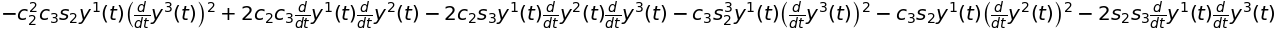

In [29]:
(ax1)

In [30]:
# substitute the initial values of the tangential acceleration : zero
accel_in_x20 = (expand_trig(trigsimp(J_1 * abs_accel))).subs({diff(y__1,t,t):0,diff(y__2,t,t):0,diff(y__3,t,t):0})
accel_in_x2 = expand(accel_in_x20)
accel_in_x2 = accel_in_x2.subs({tan(y__1):s_1/c_1,tan(y__2):s_2/c_2,tan(y__3):s_3/c_3}) 
accel_in_x2 = accel_in_x2.subs({sin(y__1):s_1,sin(y__2):s_2,sin(y__3):s_3 })
accel_in_x2 = accel_in_x2.subs({cos(y__1):c_1,cos(y__2):c_2,cos(y__3):c_3})
accel_in_x2 = expand(accel_in_x2)

In [34]:
accel_in_x2

⎡                     2                                                       
⎢    2         ⎛d    ⎞            d     d                 d     d             
⎢- c₂ ⋅c₃⋅ρ⋅s₂⋅⎜──(φ)⎟  + 2⋅c₂⋅c₃⋅──(ρ)⋅──(θ) - 2⋅c₂⋅ρ⋅s₃⋅──(φ)⋅──(θ) - c₃⋅ρ⋅s
⎢              ⎝dt   ⎠            dt    dt                dt    dt            
⎢                                                                             
⎢                     2                                                       
⎢    2         ⎛d    ⎞              d     d               d     d             
⎢- c₂ ⋅ρ⋅s₂⋅s₃⋅⎜──(φ)⎟  + 2⋅c₂⋅c₃⋅ρ⋅──(φ)⋅──(θ) + 2⋅c₂⋅s₃⋅──(ρ)⋅──(θ) + 2⋅c₃⋅s
⎢              ⎝dt   ⎠              dt    dt              dt    dt            
⎢                                                                             
⎢                                                             2               
⎢                                                      ⎛d    ⎞         d     d
⎢                                               - c₂

$-c_2^2 c_3 s_2 y^1 (\dot{y}^3)^2 + 2c_2 c_3 \dot{y}^1 \dot{y}^2 - 2c_2 s_3y^1 \dot{y}^2\dot{y}^3 - c_3 s_2^3 y^1(\dot{y}^3)^2-c_3s_2 y^1(\dot{y}^2)^2-2s_2 s_3\dot{y}^1 \dot{y}^3$

$$2c_2 c_3 \dot{y}^1 \dot{y}^2 -(c_2^2+s_2^2) c_3 s_2 y^1 (\dot{y}^3)^2   - 2c_2 s_3y^1 \dot{y}^2\dot{y}^3 -c_3s_2 y^1(\dot{y}^2)^2-2s_2 s_3\dot{y}^1 \dot{y}^3$$
and this is
$$2c_2 c_3 \dot{y}^1 \dot{y}^2 - c_3 s_2 y^1 (\dot{y}^3)^2   - 2c_2 s_3y^1 \dot{y}^2\dot{y}^3 -c_3s_2 y^1(\dot{y}^2)^2-2s_2 s_3\dot{y}^1 \dot{y}^3$$

and this is in agreement with (3.72)

In [32]:
a_c_1 = accel_in_x0[0].subs({diff(y__1,t):2,diff(y__2,t):3,diff(y__3,t):2,y__1:1,y__2:1,y__3:1})
a_c_2 = accel_in_x20[0].subs({diff(y__1,t):2,diff(y__2,t):3,diff(y__3,t):2,y__1:1,y__2:1,y__3:1})
N(a_c_2)

In [33]:
N(a_c_1)

so, the acceleration is computed in 2 ways here ...
   
1) using the vector $\mathbf T=(\dot{y}^1,\dot{y}^2,\dot{y}^3)$ and taking the covariant derivative of this vector $\nabla_r \mathbf T^i$, then forming the absolute derivate by taking the dot product $\delta \mathbf T^r =\langle\nabla_r \mathbf T^i, \mathbf T^i\rangle$. The vector $\mathbf T^i$ is already the first derivative of the coordinate. This is convenient in this case because there aren't any tangential accelerations.
   
2) computing the acceleration directly by using the formula derived for acceleration above.
   
I would use (2) in most cases, both are in agreement with 3.72. 

In fact, the vector is not expressed in a way that supports the definition of the absolute derivative as the dot product of the covariant derivative with the time derivatie of the coordinate. The vector, $\mathbf T = (\dot{y}^1, \dot{y}^2, \dot{y}^3)$ is a constant velocity, the velocity is the derivative of the coordinate. Then the derivative with respect to the coordinate $\partial_1 \left(\dot{y}^1\right)= \frac{\partial}{\partial y^1} \frac{dy^1}{dt} = \frac{d}{dt}=0$ an operator, not something physical. Therefore if the velocity were expressed in the form $v^1 = \frac{dy^1}{dt}$, then $\frac{dv^1}{dy^1} = \frac{dv^1(y^1)}{dy^1}=\frac{d}{dy^1} (v^1\circ y^1)$ then $v^1$ is a function of $y^1$. Hence it is logical to use the equation for absolute acceleration in this case, otherwise the philosophy behind the mathematics is nonsensical. 

However the concept of supressing the evaluation until after the dot product will work, starting with an abstract tensor

$$\nabla_r \mathbf T^i \frac{dx^r}{dt} = \left(\frac{\partial \mathbf T^i}{\partial x^r} + \Gamma^i_{pr}\mathbf T^p\right)\frac{dx^r}{dt} = \frac{\partial \mathbf T^i}{\partial x^r}\frac{dx^r}{dt} + \Gamma^i_{pr}\mathbf T^p \frac{dx^r}{dt} = \frac{\partial \mathbf T^i}{\partial t} + \Gamma^i_{pr}\mathbf T^p \frac{dx^r}{dt}$$

Then substituting for $\mathbf T^p = \frac{dx^p}{dt}$ yeilds the correct answer. So the cancelling of the $dx^r$ is performed instead of attempting to differentiate the tensor, which should be abstractly defined before substitution.

### Properties
   
The covariant derivative is required to have the properties that 
   
a) it commutes with contractions 
   
b) it reduces to the partial derivative on scalars.

### On the issue of Covariance, Contravariance and scale factors to reach physical components.
   
#### Case I:
   
If a vector is defined in the cartesian system, and is then contravariant transformed to the curvlinear system, then the physical components are obtained by multiplying the components of the vector by the scale factors. 
   
In this case, the transformation matrix is the inverse of the Jacobian of the transform from spherical coordinates 
   
$$\frac{\partial y^i}{\partial t}=\frac{\partial y^i}{\partial x^j}\frac{\partial x^j}{\partial t}$$
   
and if the matrix $\mathbf J = \frac{\partial x^i}{\partial y^j}$ then the transform is the inverse of $\mathbf J$. 

The physical components are $\frac{\partial y^i}{\partial t} \sqrt{g_{ii}}$ not summed. To transform back again, the inverse scale factors are used, then the vector is multiplied by $\mathbf J$.

#### Case II:

If the vector is defined in the curvlinear system and then contravariant transformed to the cartesian system, then the physical components are obtained by multiplying the components of the vector by the inverse scale factors.
   
In this case, the transformation matrix is the jacobian of the transform from spherical coordinates, $\mathbf J$ from above.

$$\frac{\partial x^i}{\partial t}=\frac{\partial x^i}{\partial y^j}\frac{\partial y^j}{\partial t}$$

and the physical components are $\frac{\partial x^i}{\partial t} \sqrt{g^{ii}}$ not summed.

#### Case III:
   
If the vector represents a quantity like the gradient, and is defined in cartesian coordinates and then covariantly transformed to the curvlinear system
   
$$\frac{\partial F}{\partial y^i} = \frac{\partial F}{\partial x^j} \frac{\partial x^j}{\partial y^i}$$ 
   
Then the quantity $\frac{\partial x^j}{\partial y^i}$ represents elements from the transpose of the jacobian matrix $\mathbf J^T$. 
   
The physical components are then given by $\frac{\partial F}{\partial y^i} \sqrt{g^{ii}}$.

#### Case IV:
   
If the vector represents a quantity like the gradient, and is defined in curvlinear coordinates and then covariantly transformed to the cartesian system
   
$$\frac{\partial F}{\partial x^i} = \frac{\partial F}{\partial y^j} \frac{\partial y^j}{\partial x^i}$$ 
   
Then the quantity $\frac{\partial x^j}{\partial y^i}$ represents elements from the transpose of the inverse of the jacobian matrix ${\mathbf {J}^{-1}}^T$. 
   
The physical components are then given by $\frac{\partial F}{\partial x^i} \sqrt{g_{ii}}$.

  
### Confusion in the presence of ambiguities.
   
The definition of a vector with physical components in such and such a system can produce confusion as to what the actual physical components *would* be, so examples should be used that represent physical calculations to avoid confusion.
   
### Dot product. 
   
The length of a vector can always be found by raising (or lowering) an index and taking a dot product.
   
### Deformation Gradient Tensor
   
The matrix $\frac{\partial x^i}{\partial y^j}$ is also known in Continuum mechanics as a deformation gradient tensor and represents the physical change in dimensions of a material under strain. The strain is calculated from the change in dimension divided by the original dimension.

In [58]:
v_a = Matrix([a_1,a_2,a_3])

In [59]:
v_a

⎡a₁⎤
⎢  ⎥
⎢a₂⎥
⎢  ⎥
⎣a₃⎦

In [65]:
J_1_inv = simplify(J_1.inv())
J_1_inv

⎡sin(y²(t))⋅cos(y³(t))  sin(y²(t))⋅sin(y³(t))   cos(y²(t)) ⎤
⎢                                                          ⎥
⎢cos(y²(t))⋅cos(y³(t))  sin(y³(t))⋅cos(y²(t))  -sin(y²(t)) ⎥
⎢─────────────────────  ─────────────────────  ────────────⎥
⎢        y¹(t)                  y¹(t)             y¹(t)    ⎥
⎢                                                          ⎥
⎢    -sin(y³(t))             cos(y³(t))                    ⎥
⎢  ────────────────       ────────────────          0      ⎥
⎣  y¹(t)⋅sin(y²(t))       y¹(t)⋅sin(y²(t))                 ⎦

In [112]:
v_s = J_1_inv * v_a
v_s

⎡a₁⋅sin(y²(t))⋅cos(y³(t)) + a₂⋅sin(y²(t))⋅sin(y³(t)) + a₃⋅cos(y²(t))⎤
⎢                                                                   ⎥
⎢a₁⋅cos(y²(t))⋅cos(y³(t))   a₂⋅sin(y³(t))⋅cos(y²(t))   a₃⋅sin(y²(t))⎥
⎢──────────────────────── + ──────────────────────── - ─────────────⎥
⎢         y¹(t)                      y¹(t)                 y¹(t)    ⎥
⎢                                                                   ⎥
⎢                  a₁⋅sin(y³(t))      a₂⋅cos(y³(t))                 ⎥
⎢               - ──────────────── + ────────────────               ⎥
⎣                 y¹(t)⋅sin(y²(t))   y¹(t)⋅sin(y²(t))               ⎦

In [113]:
simplify(J_1*v_s)

⎡a₁⎤
⎢  ⎥
⎢a₂⎥
⎢  ⎥
⎣a₃⎦

In [74]:
v_s2 = zeros(3,1)
for i in range(0,3):
    v_s2[i,0] = simplify(scale_factors[i]*v_s[i,0])
v_s2

⎡a₁⋅sin(y²(t))⋅cos(y³(t)) + a₂⋅sin(y²(t))⋅sin(y³(t)) + a₃⋅cos(y²(t))⎤
⎢                                                                   ⎥
⎢a₁⋅cos(y²(t))⋅cos(y³(t)) + a₂⋅sin(y³(t))⋅cos(y²(t)) - a₃⋅sin(y²(t))⎥
⎢                                                                   ⎥
⎣                  -a₁⋅sin(y³(t)) + a₂⋅cos(y³(t))                   ⎦

In [77]:
simplify(J_1 * v_s2)

⎡(a₁⋅sin(y³(t)) - a₂⋅cos(y³(t)))⋅y¹(t)⋅sin(y²(t))⋅sin(y³(t)) + (a₁⋅sin(y²(t))⋅
⎢                                                                             
⎢-(a₁⋅sin(y³(t)) - a₂⋅cos(y³(t)))⋅y¹(t)⋅sin(y²(t))⋅cos(y³(t)) + (a₁⋅sin(y²(t))
⎢                                                                             
⎣                                          (a₁⋅sin(y²(t))⋅cos(y³(t)) + a₂⋅sin(

cos(y³(t)) + a₂⋅sin(y²(t))⋅sin(y³(t)) + a₃⋅cos(y²(t)))⋅sin(y²(t))⋅cos(y³(t)) +
                                                                              
⋅cos(y³(t)) + a₂⋅sin(y²(t))⋅sin(y³(t)) + a₃⋅cos(y²(t)))⋅sin(y²(t))⋅sin(y³(t)) 
                                                                              
y²(t))⋅sin(y³(t)) + a₃⋅cos(y²(t)))⋅cos(y²(t)) - (a₁⋅cos(y²(t))⋅cos(y³(t)) + a₂

 (a₁⋅cos(y²(t))⋅cos(y³(t)) + a₂⋅sin(y³(t))⋅cos(y²(t)) - a₃⋅sin(y²(t)))⋅y¹(t)⋅c
                                                                              
+ (a₁⋅cos(y²(t))⋅cos(y³(t)) + a₂⋅sin(y³(t))⋅cos(y²

In [86]:
v_s3 = zeros(3,1)
for i in range(0,3):
    v_s3[i,0] = simplify(inv_scale_factors[i]*v_s2[i,0])
expand(v_s3)

⎡a₁⋅sin(y²(t))⋅cos(y³(t)) + a₂⋅sin(y²(t))⋅sin(y³(t)) + a₃⋅cos(y²(t))⎤
⎢                                                                   ⎥
⎢a₁⋅cos(y²(t))⋅cos(y³(t))   a₂⋅sin(y³(t))⋅cos(y²(t))   a₃⋅sin(y²(t))⎥
⎢──────────────────────── + ──────────────────────── - ─────────────⎥
⎢         y¹(t)                      y¹(t)                 y¹(t)    ⎥
⎢                                                                   ⎥
⎢                  a₁⋅sin(y³(t))      a₂⋅cos(y³(t))                 ⎥
⎢               - ──────────────── + ────────────────               ⎥
⎣                 y¹(t)⋅sin(y²(t))   y¹(t)⋅sin(y²(t))               ⎦

In [83]:
simplify(J_1 * v_s3)

⎡a₁⎤
⎢  ⎥
⎢a₂⎥
⎢  ⎥
⎣a₃⎦

In [103]:
def apply_scale_factors(v,scale_factors,size):
    v_a2 = zeros(size,1)
    for i in range(0,size):
        v_a2[i,0] = simplify(scale_factors[i]*v[i,0])
    return v_a2

v_a2 = apply_scale_factors(v_a,scale_factors,3)
v_a2

⎡        a₁         ⎤
⎢                   ⎥
⎢     a₂⋅y¹(t)      ⎥
⎢                   ⎥
⎣a₃⋅y¹(t)⋅sin(y²(t))⎦

In [91]:
v_s5 = simplify(J_1_inv * v_a2)
v_s5

⎡(a₁⋅cos(y³(t)) + a₂⋅y¹(t)⋅sin(y³(t)) + a₃⋅y¹(t)⋅cos(y²(t)))⋅sin(y²(t))⎤
⎢                                                                      ⎥
⎢ a₁⋅cos(y²(t))⋅cos(y³(t))                                    2        ⎥
⎢ ──────────────────────── + a₂⋅sin(y³(t))⋅cos(y²(t)) - a₃⋅sin (y²(t)) ⎥
⎢          y¹(t)                                                       ⎥
⎢                                                                      ⎥
⎢                 -a₁⋅sin(y³(t)) + a₂⋅y¹(t)⋅cos(y³(t))                 ⎥
⎢                 ────────────────────────────────────                 ⎥
⎣                           y¹(t)⋅sin(y²(t))                           ⎦

In [93]:
expand(v_s5) == expand(v_s)

False

In [95]:
simplify(J_1*v_s5)

⎡        a₁         ⎤
⎢                   ⎥
⎢     a₂⋅y¹(t)      ⎥
⎢                   ⎥
⎣a₃⋅y¹(t)⋅sin(y²(t))⎦

In [97]:
b_1,b_2,b_3 = symbols('b_1,b_2,b_3')
v_b = Matrix([b_1,b_2,b_3])
v_b

⎡b₁⎤
⎢  ⎥
⎢b₂⎥
⎢  ⎥
⎣b₃⎦

In [101]:
v_xa = simplify(J_1*v_b)
v_xa

⎡b₁⋅sin(y²(t))⋅cos(y³(t)) + b₂⋅y¹(t)⋅cos(y²(t))⋅cos(y³(t)) - b₃⋅y¹(t)⋅sin(y²(t
⎢                                                                             
⎢b₁⋅sin(y²(t))⋅sin(y³(t)) + b₂⋅y¹(t)⋅sin(y³(t))⋅cos(y²(t)) + b₃⋅y¹(t)⋅sin(y²(t
⎢                                                                             
⎣                           b₁⋅cos(y²(t)) - b₂⋅y¹(t)⋅sin(y²(t))               

))⋅sin(y³(t))⎤
             ⎥
))⋅cos(y³(t))⎥
             ⎥
             ⎦

In [124]:
v_xa2 = simplify(J_1*apply_scale_factors(v_b,scale_factors,3))
simplify(J_1_inv * expand_trig(v_xa2))

⎡        b₁         ⎤
⎢                   ⎥
⎢     b₂⋅y¹(t)      ⎥
⎢                   ⎥
⎣b₃⋅y¹(t)⋅sin(y²(t))⎦

In [115]:
# the inverse is both a left inverse and a right inverse.
simplify(J_1*J_1_inv)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [116]:
simplify(J_1_inv*J_1)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦